Ho va ten: Ly Hoang Thuan

MSSV: 19522315

# Import package

In [1]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 2.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.1 MB/s 
     |████████████████████████████████| 6.3 MB 51.9 MB/s 
     |████████████████████████████████| 16.7 MB 34.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 2.1 MB/s 
     |████████████████████████████████| 140 kB 56.6 MB/s 
     |████████████████████████████████| 384 kB 34.9 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [30]:
import os
import time
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import sys
from selenium import webdriver
import random
from sklearn.cluster import KMeans
import folium
from geopandas.tools import sjoin
from folium.plugins import HeatMap

# Clone data repo

In [4]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1957, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 1957 (delta 7), reused 1 (delta 1), pack-reused 1911
Receiving objects: 100% (1957/1957), 169.10 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (1056/1056), done.
Checking out files: 100% (542/542), done.


In [8]:
%cd /content/CSL_HCMC

/content/CSL_HCMC


In [9]:
!ls

Data	       index.html  outputs    scenarios
data_analysis  modules	   README.md  Software_VN


# Load ranh giới quận huyện và dân số quận huyện

In [ ]:
# /content/CSL_HCMC/Data/GIS/Population

In [13]:
df = gpd.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
df = df.to_crs('epsg: 4326')
df.head(10)

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.60,41902.50,41828.00,41793.50,42015.6,42278.60,41138.5,10478.512538,5.707881e+06,"POLYGON ((106.66909 10.75992, 106.66888 10.759..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.90,44404.00,44437.10,44937.20,45657.2,46206.60,40897.6,10833.546511,5.131351e+06,"POLYGON ((106.65855 10.76900, 106.65885 10.767..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.30,36903.50,37387.10,37316.80,37174.3,37482.60,33530.3,12392.134315,4.889837e+06,"POLYGON ((106.67277 10.81412, 106.67361 10.813..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.10,19747.90,20012.10,20281.40,20927.5,20979.80,21162.2,23807.894025,2.243513e+07,"POLYGON ((106.64909 10.83662, 106.65187 10.836..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.60,23231.10,23372.50,23478.90,23559.4,23605.60,24016.8,29544.712130,2.078389e+07,"POLYGON ((106.69197 10.80032, 106.69198 10.800..."


In [14]:
print(df.shape)

(24, 26)


# Load dữ liệu click của người dùng

Download data from https://drive.google.com/drive/u/0/folders/1ok73MqdjPcuD4N10rGRICz40TST0gest


Then upload file from local

In [22]:
from google.colab import files

uploaded = files.upload()

Saving click_data.json to click_data (1).json


In [24]:
user_clck_dat = gpd.read_file('/content/CSL_HCMC/click_data.json')
user_clck_dat.head(10)

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
5,1,POINT (106.75131 10.85530)
6,1,POINT (106.66677 10.79108)
7,1,POINT (106.68205 10.82357)
8,1,POINT (106.73263 10.74918)
9,1,POINT (106.73554 10.72743)


In [25]:
user_clck_dat = user_clck_dat.to_crs('epsg: 4326')

# Lọc ra 5 quận huyện có tốc độ tăng MẬT ĐỘ dân số nhanh nhất (Dùng dữ liệu 2019  và 2017) (Pop2019/Pop2017)

In [63]:
df['Fastest_grow_rate'] = df['Pop_2019']/df['Pop_2017']
df = df.nlargest(5, ['Fastest_grow_rate'])

In [64]:
top_5_pop_grow = np.array(df["Dist_Name"])
print('Top 5 quận có tốc độ tăng trưởng nhanh nhất là:')
for district in top_5_pop_grow:
    print(district)

Top 5 quận có tốc độ tăng trưởng nhanh nhất là:
District 9
Hoc Mon
Nha Be
District 12
District 2


# Spatial join (from geopandas.tools import sjoin) để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất

In [65]:
data_s_join = sjoin(user_clck_dat, df, how='left', op='within')
data_s_join.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Fastest_grow_rate
0,1,POINT (106.71136 10.85113),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,POINT (106.71695 10.74449),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,POINT (106.66315 10.83289),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,POINT (106.66267 10.83339),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,POINT (106.65977 10.83729),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


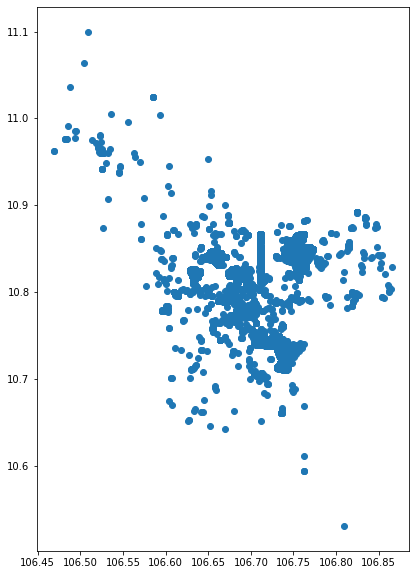

In [66]:
data_s_join["geometry"].plot(figsize=(10,10))

# Chạy KMean cho top 5 quận huyện này. Lấy K = 20

In [67]:
def kmeans(data_frame, district, n_clusters=20):
    table = data_frame[data_frame.Dist_Name == district]
    kmeans = KMeans(n_clusters) 
    x = pd.Series(table['geometry'].apply(lambda p: p.x)) 
    y = pd.Series(table['geometry'].apply(lambda p: p.y)) 
    point = np.column_stack((x, y)) 
    y_means = kmeans.fit_predict(point) 
    table['cluster'] = y_means 
    return table

In [68]:
k = 20

In [69]:
import pandas as pd

In [70]:
data_top_5 = [kmeans(data_s_join, district, k) for district in top_5_pop_grow]
data_top_5

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

[       dbh                    geometry  index_right   Dist_Name Dist_ID  \
 222      1  POINT (106.76471 10.82926)         16.0  District 9     763   
 429      1  POINT (106.79251 10.78538)         16.0  District 9     763   
 1316     1  POINT (106.81852 10.78415)         16.0  District 9     763   
 1381     1  POINT (106.76463 10.82930)         16.0  District 9     763   
 2129     1  POINT (106.81964 10.78909)         16.0  District 9     763   
 ...    ...                         ...          ...         ...     ...   
 81983    1  POINT (106.84658 10.87865)         16.0  District 9     763   
 82069    1  POINT (106.78265 10.82731)         16.0  District 9     763   
 82657    1  POINT (106.80625 10.84451)         16.0  District 9     763   
 83095    1  POINT (106.83235 10.84348)         16.0  District 9     763   
 83372    1  POINT (106.76182 10.82430)         16.0  District 9     763   
 
           Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
 222    Dis

In [71]:
def heat_data(table): 
    index = table['cluster'].value_counts().idxmax()
    table = table[(table['cluster'] == index)]
    heat_data = [[row['geometry'].y,row['geometry'].x] for index, row in table.iterrows()]
    return heat_data

In [72]:
map = folium.Map(location=[10.8, 107], zoom_start=10, tiles='CartoDB positron')

for _, r in df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(map)

data_s_join = data_s_join.to_crs(epsg=2263)
data_s_join['centroid'] = data_s_join.centroid
data_s_join = data_s_join.to_crs(epsg=4326)
data_s_join['centroid'] = data_s_join['centroid'].to_crs(epsg=4326)

In [73]:
for district in data_top_5:
    HeatMap(heat_data(district)).add_to(map)

# Show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP

In [74]:
map

# Lưu heatmap xuống file png

In [77]:
type(map)

folium.folium.Map

In [ ]:
'''import io
from PIL import Image

img_data = map._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')'''

In [79]:
from selenium import webdriver

In [106]:
!apt-get update 
!apt install chromium-chromedriver

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [107]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
map_path='MAP.html'
map.save(map_path)
map_URL='file://{path}/{mapfile}'.format(path=os.getcwd(), mapfile=map_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [108]:
driver.get(map_URL)

driver.save_screenshot('map.png')
driver.quit()